In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')

%run '../functions.py'
%run '../classes.py'
model_w2v_settings = return_best_model()
import copy as cp
model_w2v_settings = cp.deepcopy(model_w2v_settings)
model_w2v_settings['model_path'] = "../all_datasets/" + model_w2v_settings['model_path']

model_w2v = Word2VecModel(model_w2v_settings)

# read preprocessed data from pickle file
df = pd.read_pickle('data/preprocessed_titles_labels.pkl')
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adammajczyk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adammajczyk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adammajczyk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/adammajczyk/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adammajczyk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/adammajczyk/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/adammajczyk/nltk_data..

,title,is_clickbait,text,dataset,sample
3,"[hillary, clinton, john, kerry, divergent, pat...",0,"WASHINGTON — Early in 2011, after a hectic ...",fake-news,train
7,"[fifa, seventeen, special, arrival, season, pl...",1,Support Us Fifa 17 – The special arrivals seas...,fake-news,train
11,"[orlando, shooting, unlikely, lead, major, new...",0,WASHINGTON — It didn’t happen after a congr...,fake-news,train
14,"[war, islam, islam, want, war, peace]",1,link I am sure that this post will fall on dea...,fake-news,train
16,"[university, texas, campus, saying, concealed,...",0,"AUSTIN, Tex. — As classes began here at the...",fake-news,train


In [14]:
# split data into train and test stratified by y
import os
import pickle

df['title_vector'] = [get_word_vectors(model_w2v, title, aggregation='mean') for title in df['title']]

X_train = np.vstack(df[df['sample']=='train']['title_vector'])
X_test = np.vstack(df[df['sample']=='val2']['title_vector'])



y_train = df[df['sample']=='train']['is_clickbait']
y_test = df[df['sample']=='val2']['is_clickbait']


# read scaler from file
with open('predictive_models/scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


/Users/adammajczyk/anaconda3/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.2 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [15]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=[f'dim_{i}' for i in range(X_train_scaled.shape[1])])
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=[f'dim_{i}' for i in range(X_test_scaled.shape[1])])

In [16]:
X_train_scaled_df

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,dim_10,dim_11,dim_12,dim_13,dim_14,dim_15,dim_16,dim_17,dim_18,dim_19
0,-0.138173,0.200100,-0.713081,0.075724,0.561897,-0.177707,-1.591121,0.357439,0.333854,-0.623907,-0.272155,0.395269,-0.382965,0.223727,0.282360,-0.300473,0.140948,-0.390997,0.260421,0.318208
1,-0.904572,0.302703,-1.279143,1.161377,1.189007,-0.119745,0.528900,-0.907479,-0.564368,-1.556327,0.916748,0.491515,0.966174,-0.653562,3.364673,0.224342,-2.397926,0.329039,-0.714079,1.576997
2,0.149010,0.922372,-0.571740,0.154472,-0.630682,-0.580148,0.157959,-0.200726,0.531991,0.023929,-0.443648,-0.214128,-0.449977,0.464434,0.196654,-0.833227,0.196092,-0.808296,0.192213,0.063646
3,0.563154,-0.709427,0.262318,-1.324451,1.017962,0.621718,-1.042194,0.359054,-1.531955,-0.114648,-0.780057,0.077786,-0.017670,1.136728,-0.475358,-0.246018,1.023479,-1.095826,0.474710,0.515631
4,0.266910,0.500232,-0.222498,0.377007,-0.077918,-0.674046,0.157269,-0.902893,0.663325,1.001087,-0.437652,-0.148873,-0.264158,0.487052,0.212102,-0.686198,0.557015,-0.932726,-0.655394,0.186175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17786,0.941323,1.493850,-1.105394,0.781710,-0.312584,-0.144954,-0.243503,-0.380311,0.469801,1.540109,-0.899795,0.088908,0.084870,0.684226,-0.540260,0.241656,0.195666,-0.852623,-0.650858,0.093125
17787,0.611000,0.838558,-0.580173,-0.552673,-0.190303,0.652970,-2.595907,1.879190,0.231104,-0.199638,-0.146996,-0.270930,0.446153,-0.045426,1.496668,0.354974,0.462398,-0.782004,1.857527,0.549329
17788,1.136396,0.743120,-0.499400,-1.405517,1.461072,0.562498,-0.973583,0.410013,0.335149,0.823483,-0.836337,-0.312241,-0.006700,0.806831,0.064757,0.292123,0.286202,-0.846021,-0.877005,0.251745
17789,0.151116,0.096036,0.689157,-0.908179,0.255681,-1.015939,1.003316,-1.218815,0.839329,1.727758,-0.057691,-0.609896,0.058638,1.213770,1.204274,-0.137618,0.905020,-0.364350,-0.697188,0.702330


In [17]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

def return_model_with_param(model_name, param = dict()):
    if model_name == 'decision_tree':
        model = DecisionTreeClassifier(**param)
    elif model_name == 'random_forest':
        model = RandomForestClassifier(**param)
    elif model_name == 'xgboost':
        model = XGBClassifier(**param)
    elif model_name == 'lightgbm':
        model = LGBMClassifier(**param, verbose=-1)
    elif model_name == 'catboost':
        model = CatBoostClassifier(**param, verbose=0)
    return model

In [18]:
# train LightGBM model for each dimension


from sklearn.metrics import roc_auc_score, f1_score
from tqdm.notebook import tqdm



result_dict = {}
model_names = ['lightgbm', 'decision_tree',   'xgboost', 'random_forest','catboost',]
for name in model_names:
    result_dict[name] = dict()

models = dict()
for name in model_names:
    models[name] = cp.deepcopy(0)
models['lightgbm'] = 1

for name in tqdm(model_names):
    # for dim in tqdm(X_train_scaled_df.columns):
    #     model = return_model_with_param(name)
    #     model.fit(X_train_scaled_df[dim].values.reshape(-1,1), y_train)

    #     # calculate auc, f1
    #     y_pred_proba = model.predict_proba(X_test_scaled_df[dim].values.reshape(-1,1))[:, 1]
    #     auc = roc_auc_score(y_test, y_pred_proba)

    #     y_pred = model.predict(X_test_scaled_df[dim].values.reshape(-1,1))
    #     f1 = f1_score(y_test, y_pred)
    #     result_dict[name][dim] = {'auc': auc, 'f1': f1}
    model = return_model_with_param(name)

    model.fit(X_train_scaled_df, y_train)
    result_dict[name]['feature_importance'] = model.feature_importances_

    models[name] = cp.deepcopy(model)
result_df = pd.DataFrame(result_dict).T






  0%|          | 0/5 [00:00<?, ?it/s]

In [19]:
models

{'lightgbm': LGBMClassifier(verbose=-1),
 'decision_tree': DecisionTreeClassifier(),
 'xgboost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 'random_forest': RandomForestClassifier(),
 'catboost': <catboost.core.CatBoostClassifier at 0x2ad153410>}

In [20]:
result_df['feature_importance_mean'] = result_df['feature_importance'].apply(lambda x: np.mean(x))
result_df['feature_importance_std'] = result_df['feature_importance'].apply(lambda x: np.std(x))

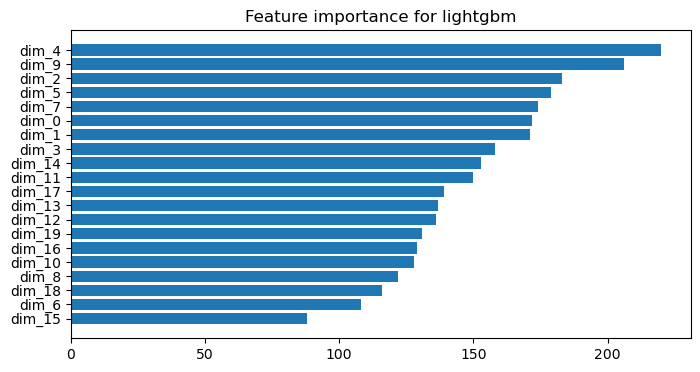

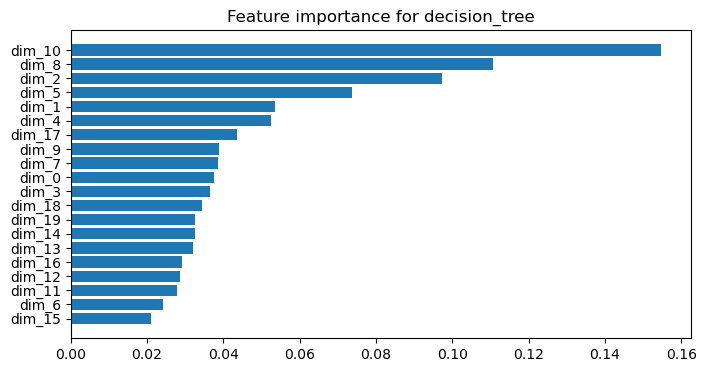

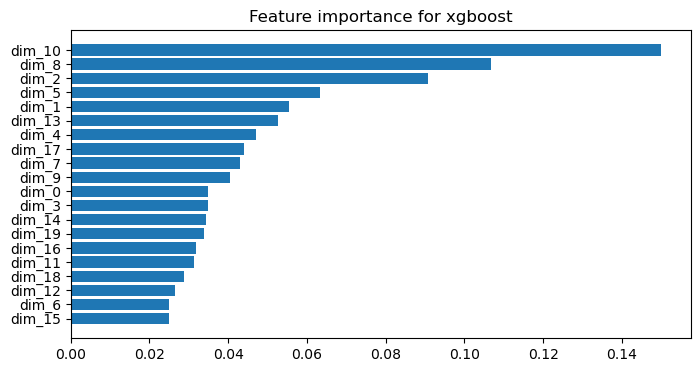

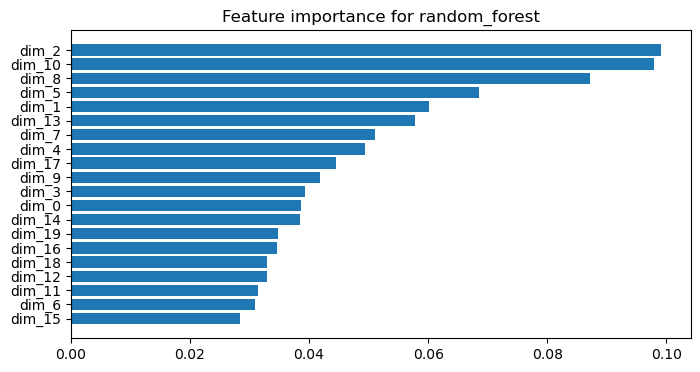

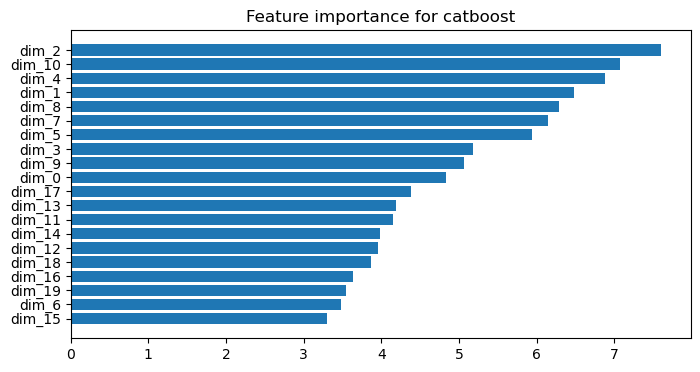

In [21]:
import matplotlib.pyplot as plt
for name in model_names:
    feature_importance = result_df.loc[name]['feature_importance']
    sorted_indices = np.argsort(feature_importance)[::]
    sorted_features = X_train_scaled_df.columns[sorted_indices]
    sorted_importance = feature_importance[sorted_indices]
    
    plt.figure(figsize=(8, 4))
    plt.barh(sorted_features, sorted_importance)
    plt.title(f'Feature importance for {name}')


In [22]:
models

{'lightgbm': LGBMClassifier(verbose=-1),
 'decision_tree': DecisionTreeClassifier(),
 'xgboost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 'random_forest': RandomForestClassifier(),
 'catboost': <catboost.core.CatBoostClassifier at 0x2ad153410>}

In [23]:
# get 10 worst performing dimensions for each model based on feature importance
import dalex as dx
worst_performing_dimensions = dict()
for name in model_names:
    worst_performing_dimensions[name] = None
for name in model_names:
    explainer = dx.Explainer(models[name], X_train_scaled_df, y_train, verbose=False)
    feature_importance = explainer.model_parts().result
    feature_importance = feature_importance[feature_importance['variable'].str.contains('dim')]
    # print(feature_importance)
    sorted_importance = feature_importance.sort_values(by='dropout_loss', ascending=True)
    # get 10 worst performing dimensions
    sorted_features = sorted_importance.head(10)
    worst_performing_dimensions[name] = sorted_features['variable'].values
    print(sorted(sorted_features['variable'].values))
worst_performing_dimensions

['dim_0', 'dim_11', 'dim_12', 'dim_13', 'dim_15', 'dim_16', 'dim_18', 'dim_19', 'dim_3', 'dim_6']


/Users/adammajczyk/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


['dim_11', 'dim_12', 'dim_14', 'dim_15', 'dim_16', 'dim_18', 'dim_19', 'dim_3', 'dim_6', 'dim_7']
['dim_0', 'dim_11', 'dim_12', 'dim_13', 'dim_14', 'dim_15', 'dim_16', 'dim_18', 'dim_19', 'dim_6']


/Users/adammajczyk/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


['dim_0', 'dim_11', 'dim_12', 'dim_14', 'dim_15', 'dim_16', 'dim_18', 'dim_19', 'dim_3', 'dim_6']
['dim_0', 'dim_11', 'dim_12', 'dim_13', 'dim_14', 'dim_15', 'dim_16', 'dim_18', 'dim_19', 'dim_6']


{'lightgbm': array(['dim_6', 'dim_18', 'dim_15', 'dim_12', 'dim_16', 'dim_11',
        'dim_13', 'dim_3', 'dim_19', 'dim_0'], dtype=object),
 'decision_tree': array(['dim_15', 'dim_6', 'dim_12', 'dim_16', 'dim_11', 'dim_19',
        'dim_14', 'dim_3', 'dim_18', 'dim_7'], dtype=object),
 'xgboost': array(['dim_6', 'dim_18', 'dim_12', 'dim_13', 'dim_15', 'dim_11',
        'dim_16', 'dim_19', 'dim_14', 'dim_0'], dtype=object),
 'random_forest': array(['dim_15', 'dim_6', 'dim_18', 'dim_11', 'dim_19', 'dim_16',
        'dim_12', 'dim_0', 'dim_14', 'dim_3'], dtype=object),
 'catboost': array(['dim_15', 'dim_6', 'dim_18', 'dim_13', 'dim_12', 'dim_19',
        'dim_16', 'dim_11', 'dim_14', 'dim_0'], dtype=object)}

In [24]:
# get intersection of worst performing dimensions
worst_performing_dimensions_intersection = set(worst_performing_dimensions['lightgbm']).intersection(set(worst_performing_dimensions['decision_tree']), set(worst_performing_dimensions['xgboost']), set(worst_performing_dimensions['random_forest']), set(worst_performing_dimensions['catboost']))
worst_performing_dimensions_intersection, len(worst_performing_dimensions_intersection)

({'dim_11', 'dim_12', 'dim_15', 'dim_16', 'dim_18', 'dim_19', 'dim_6'}, 7)

In [25]:
# save which dimensions to remove to file
with open('predictive_models/worst_performing_dimensions_intersection.pkl', 'wb') as f:
    pickle.dump(worst_performing_dimensions_intersection, f)

Text(0, 0.5, 'Prawdopodobieństwo [0, 1]')

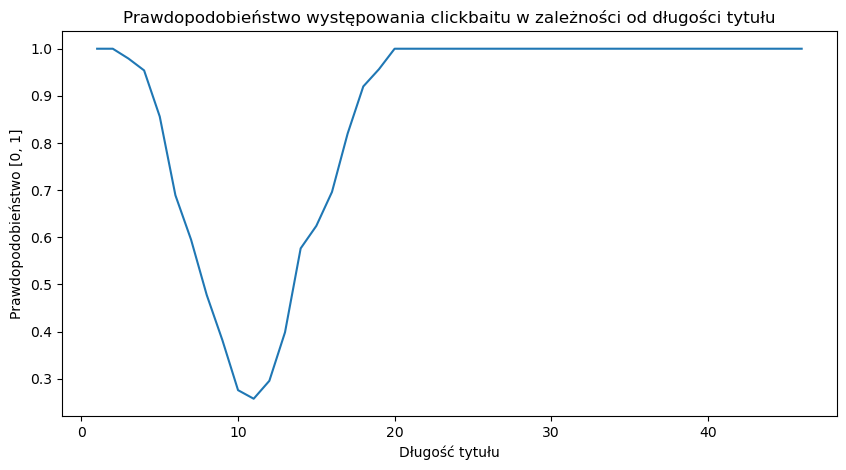

In [26]:
# do we want title length as a feature?
df['title_length'] = df['title'].apply(lambda x: len(x))

df.groupby('title_length')['is_clickbait'].mean().plot( figsize=(10, 5))
plt.title('Prawdopodobieństwo występowania clickbaitu w zależności od długości tytułu')
plt.xlabel('Długość tytułu')
plt.ylabel('Prawdopodobieństwo [0, 1]')